# Motivación
+ Clasificar: imágenes, texto, otros datos.
+ Predecir: valoraciones de ítems, respuestas de mails (secuencias de texto), entradas en pantallas touch.
+ Reaccionar al ambiente: conducción automática, jugar videojuegos.
+ Describir textualmente imágenes o videos.

## Herramientas
+ Python 2.7 (Jupyter notebook)
+ numpy
+ theano
+ Keras
+ scipy 
+ matplotlib

## Problema
En aprendizaje automático se posee un conjunto de datos y se desea que un programa generalize relaciones entre los datos:
+ Aprendizaje supervisado: es la tarea de aprender una función desde datos etiquetados.
+ Aprendizaje no supervisado: es la tarea de realizar inferencia sobre datos no etiquetados

### Ejemplo
En nuestro ejemplo realizaremos *aprendizaje supervisado*. Utilizando un conjunto de datos generados. Generaremos 51 datos (x) y sus correspondientes etiquetas (y) utilizando la siguiente formula, donde rand es un número random entre 0 y 1: <br>

$$y=3*x+(rand-0.5)$$

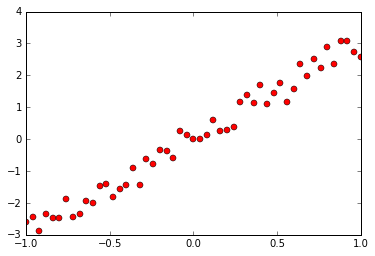

x: [-1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6  -0.56
 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12 -0.08
 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4
  0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88
  0.92  0.96  1.  ]
y: [-2.61222051 -2.45020659 -2.87970459 -2.35584659 -2.46912088 -2.46972051
 -1.862948   -2.44847506 -2.33259216 -1.95490259 -1.99669622 -1.48275019
 -1.42215315 -1.82197859 -1.57466332 -1.44576643 -0.9173368  -1.44289007
 -0.61043576 -0.7698984  -0.33162056 -0.37007726 -0.60612035  0.24141631
  0.13807452  0.00946656 -0.01020968  0.12250257  0.61018237  0.24805481
  0.29867575  0.37528744  1.17608683  1.37448123  1.14860434  1.69840003
  1.10849843  1.4386622   1.75620275  1.18016876  1.58736013  2.35945203
  1.97327868  2.50451125  2.23405081  2.87760934  2.36521501  3.07130391
  3.08173212  2.72925578  2.56271327]


In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def gen_random_data(mult):
    _x = np.linspace(-1, 1, 51)
    _error = (np.random.rand(*_x.shape) - .5)
    _y = _x * mult + _error
    return _x, _y


x, y = gen_random_data(3)
plt.plot(x, y, 'ro')
plt.show()
print('x: {}'.format(x))
print('y: {}'.format(y))

## Objetivo
El objetivo es aprender una función $h(x)=y'$ tal que dado una función de error $e(y, y')$ esta sea mínima.<br>
En regresión lineal, se asume que $h(x)$ tiene la siguiente estructura:

$$h(x) = a*x + b$$

Siendo $a$ y $b$ los parámetros a aprender de la función. Por simplicidad, en el ejemplo asumiremos que $b=0$. Obviamente, conocemos que $a=3$. <br>
El siguiente gráfico contrasta nuestro conjunto de datos con la función a aprender.

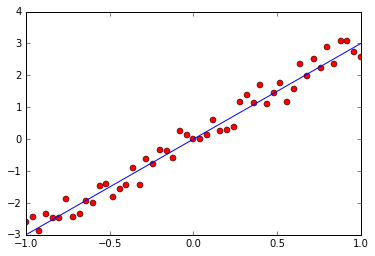

In [11]:
def lineal(mult, x):
    return mult * x


plt.plot(x, y, 'ro', x, lineal(3, x))
plt.show()

## Función de Error
Si bien existen numerosas funciones de error, utilizaremos *Mean Squared Error*, la cual se define:<br>

$$MSE=\frac{\sum(Y-Y')^{2}}{N}$$

Para $a=3$ el MSE es:

In [12]:
def mse(y, pred):
    return np.sum(np.square(y-pred))/len(y)

print('Error {}'.format(mse(y, lineal(3, x))))

Error 0.0834147593353


Si no conociéramos el valor de $a$, una opción para aprenderlo sería recorrer todos sus posibles valores y seleccionar el mejor:

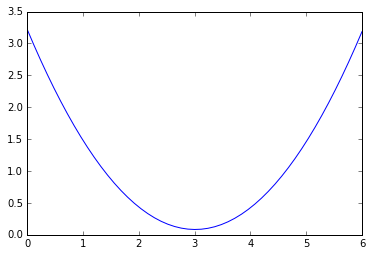

In [13]:
def exp_error(y, x, mul_vals):
    def single_error(m):
        return mse(y, lineal(m, x))
    _s = np.vectorize(single_error)
    return _s(mul_vals)

muls = np.linspace(0, 6, 51)
plt.plot(muls, exp_error(y, x, muls))
plt.show()

### ¡Problemas!
Explorar todos los posibles valores es muy costoso, en especial si tenemos más de un problema.

### Solución
Dado que la función de error tiene un solo mínimo, se podrían tomar 2 valores cercanos de manera de conocer en qué dirección es conveniente explorar. La función $h(x)$ en realidad es una función que depende no solo de los datos $x$, sino que también del parámetro a aprender $a$, entonces la notaremos como $h(x,a)$. Para conocer la pendiente de la función de error dado el parámetro a conocer debemos hacer:

$$pendiente(a_{1}, a_{0})=\frac{MSE(y,h(x,a_{1}))-MSE(y,h(x,a_{0}))}{a_{1}-a_{0}}$$ 

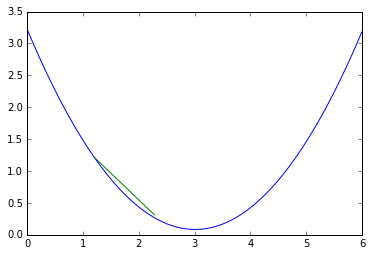

In [14]:
errors = exp_error(y, x, muls)
pendiente = (errors[10]-errors[20])/(muls[10]-muls[20])
correccion_ordenada_origen = -pendiente*muls[10] + errors[10]
plt.plot(muls, errors, muls[10:20], lineal(pendiente, muls[10:20])+correccion_ordenada_origen)
plt.show()

Si definimos a $a_{1}=a_{0}+\Delta$ entonces:

$$\lim_{\Delta \rightarrow 0} pendiente(a_{0}+\Delta,a_{0})= \lim_{\Delta \rightarrow 0} \frac{MSE(y,h(x,a_{0}+\Delta))-MSE(y,h(x,a_{0}))}{\Delta} =\frac{dMSE(y,h(x,a))}{da}$$

Esta derivada se puede resolver por regla de la cadena:

$$\frac{dMSE(y,h(x,a))}{da}=\frac{dMSE(Y,h(x,a))}{d(h(x,a))}.\frac{(h(x,a))}{da}$$

La primer derivada se resuelve, devuelta por regla de la cadena:

$$\frac{dMSE(y,h(x,a))}{d(h(x,a)}=\frac{d(\frac{1}{N}\sum(y-h(x,a))^{2}}{d(h(x,a))}=-\frac{2}{N}\sum(y-h(x,a))$$

La segunda derivada se resuelve así:

$$\frac{dh(x,a)}{da}=\frac{d(a*x)}{da}=x$$

Finalmente, resulta en:

$$\frac{dMSE(y,h(x,a))}{da}=\frac{dMSE(Y,h(x,a))}{d(h(x,a))}.\frac{(h(x,a))}{da}=\frac{-2\sum(y-a*x)*x}{N}$$

## Implementación y chequeo

Por un lado, implematmos la derivada de nuestra función de error.

In [15]:
def grad_mse(y, x, mult):
    return -2*np.sum((y-mult*x)*x)/len(y)

Para verificar que la implementación sea correcta, o por lo menos darnos más seguridad, se puede realizar el siguiente chequeo:

$$abs(\frac{dMSE(y,h(x,a))}{da}-\frac{MSE(y,h(x,a+\varepsilon)-MSE(y,h(x,a-\varepsilon)}{2*\varepsilon})<\varepsilon$$

para $\varepsilon$ cercanos a 0, por ejemplo $\varepsilon=1e-6$.

In [16]:
def grad_checking(y, x, mult, epsilon=1e-6):
    ge = (mse(y, lineal(mult+epsilon, x)) - mse(y, lineal(mult-epsilon, x))) / (2 * epsilon)
    ga = grad_mse(y, x, mult)
    print '{} Gradiente estimado {}, analitico {}, diferencia {}, val: {}'.format(mult, ge, ga,
                                                                                  abs(ge - ga),
                                                                                  abs(ge - ga) < epsilon)
    pass


for i in xrange(0, 100):
    grad_checking(y, x, i)

0 Gradiente estimado -2.08584336936, analitico -2.08584336927, diferencia 9.11719588714e-11, val: True
1 Gradiente estimado -1.39251003595, analitico -1.39251003593, diferencia 1.20230492229e-11, val: True
2 Gradiente estimado -0.699176702673, analitico -0.699176702602, diferencia 7.16517956079e-11, val: True
3 Gradiente estimado -0.00584336928844, analitico -0.00584336926818, diferencia 2.02583219297e-11, val: True
4 Gradiente estimado 0.687489964124, analitico 0.687489964065, diferencia 5.88910031851e-11, val: True
5 Gradiente estimado 1.38082329759, analitico 1.3808232974, diferencia 1.93551175087e-10, val: True
6 Gradiente estimado 2.07415663067, analitico 2.07415663073, diferencia 6.03663785625e-11, val: True
7 Gradiente estimado 2.76748996475, analitico 2.76748996407, diferencia 6.84916567906e-10, val: True
8 Gradiente estimado 3.46082329639, analitico 3.4608232974, diferencia 1.01229158389e-09, val: True
9 Gradiente estimado 4.15415662935, analitico 4.15415663073, diferencia 1.3

## Descendiente por el gradiente (*Gradient Descent*)

*Gradient Descent* es una técnica de optimización que utiliza el gradiente, que es la generalización de la derivada para funciones en espacios vectoriales, para actualizar los parámetros a optimizar. Básicamente, se utiliza el gradiente para ajustar los parámetros de la función moviéndolos en sentido contrario al gradiente y proporcionalmente a su magnitud.<br>
+ En este caso $\nabla MSE(y, h(x,a))=\frac{dMSE(y,h(x,a))}{da}$
+ En el caso de que $\overline{a}=(a_{0},a_{1},...,a_{m})$ entonces $\nabla MSE(y, h(x,\overline{a}))=(\frac{dMSE(y,h(x,\overline{a}))}{da_{0}},\frac{dMSE(y,h(x,\overline{a}))}{da_{1}},...,\frac{dMSE(y,h(x,\overline{a}))}{da_{n}}) $ <br>

### *Gradient Descent*
+ Inicializar parámetro $a$ con un valor aleatorio.
+ Por una cantidad de $epochs$:
    + Calcular el gradiente $g$ del $MSE(y,h(x,a))$
    + Actualizar $a \leftarrow a - lr * g$ donde $lr$ es la tasa de aprendizaje conocido como *learning rate*.

Valor Aleatorio de "a": -3.56744911298
Error: 15.0740052449
0 Error: 14.8668559976
1 Error: 14.6625692619
2 Error: 14.461105482
3 Error: 14.2624256486
4 Error: 14.0664912915
5 Error: 13.873264472
6 Error: 13.6827077758
7 Error: 13.4947843055
8 Error: 13.3094576736
9 Error: 13.1266919955
10 Error: 12.9464518824
11 Error: 12.7687024345
12 Error: 12.5934092344
13 Error: 12.4205383401
14 Error: 12.2500562787
15 Error: 12.08193004
16 Error: 11.9161270698
17 Error: 11.7526152638
18 Error: 11.5913629613
19 Error: 11.4323389392
20 Error: 11.2755124057
21 Error: 11.1208529946
22 Error: 10.9683307594
23 Error: 10.8179161673
24 Error: 10.6695800936
25 Error: 10.5232938161
26 Error: 10.3790290095
27 Error: 10.2367577399
28 Error: 10.0964524594
29 Error: 9.95808600091
30 Error: 9.82163157251
31 Error: 9.68706275267
32 Error: 9.55435348493
33 Error: 9.42347807288
34 Error: 9.29441117522
35 Error: 9.16712780082
36 Error: 9.04160330389
37 Error: 8.91781337922
38 Error: 8.79573405745
39 Error: 8.675341

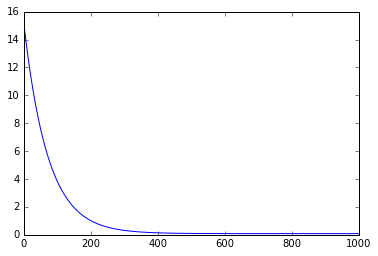

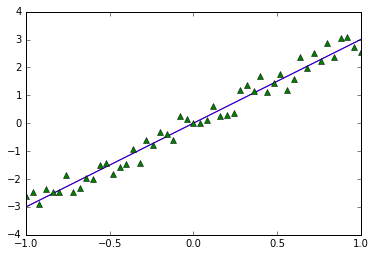

Error para el multiplicador 3: 0.0834147593353
Error para el multiplicador aprendido "a" 3.0021710501: 0.0834037070868


In [17]:
import random
a = random.random() * 10 - 5
print('Valor Aleatorio de "a": {}'.format(a))
lr = 0.01
errors = [mse(y, lineal(a, x))]
print('Error: {}'.format(errors[0]))
epochs = 1000
for i in xrange(0, epochs):
    a = a - lr * grad_mse(y, x, a)
    e = mse(y, lineal(a, x))
    print('{} Error: {}'.format(i, e))
    errors.append(e)
print('Final a: {}'.format(a))
plt.plot(np.asarray(range(0, epochs + 1)), np.asarray(errors))
plt.show()
plt.plot(x, lineal(3, x), 'r-', x, lineal(a, x), 'b-', x, y, 'g^')
plt.show()
print('Error para el multiplicador 3: {}'.format(mse(y, lineal(3,x))))
print('Error para el multiplicador aprendido "a" {}: {}'.format(a, mse(y, lineal(a,x))))

# Theano
Derivar es una operación mecánica, existen librería que lo hace por nosotros. Por ejemplo [Theano](http://deeplearning.net/software/theano/).

Valor Aleatorio de "a": -3.22055770809
0 Error: 3.22094488144
1 Error: 3.17758846283
2 Error: 3.13483095169
3 Error: 3.09266424179
4 Error: 3.0510802269
5 Error: 3.01007080078
6 Error: 2.96962833405
7 Error: 2.92974472046
8 Error: 2.89041209221
9 Error: 2.8516228199
10 Error: 2.81336975098
11 Error: 2.77564525604
12 Error: 2.73844218254
13 Error: 2.70175290108
14 Error: 2.66557097435
15 Error: 2.62988877296
16 Error: 2.5946996212
17 Error: 2.55999684334
18 Error: 2.52577352524
19 Error: 2.49202346802
20 Error: 2.45873951912
21 Error: 2.42591547966
22 Error: 2.39354515076
23 Error: 2.36162209511
24 Error: 2.33014011383
25 Error: 2.29909324646
26 Error: 2.26847505569
27 Error: 2.23828029633
28 Error: 2.20850276947
29 Error: 2.17913675308
30 Error: 2.15017652512
31 Error: 2.12161636353
32 Error: 2.0934510231
33 Error: 2.0656747818
34 Error: 2.03828239441
35 Error: 2.01126861572
36 Error: 1.98462796211
37 Error: 1.95835542679
38 Error: 1.93244600296
39 Error: 1.90689480305
40 Error: 1.8816

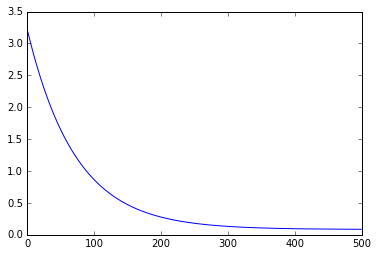

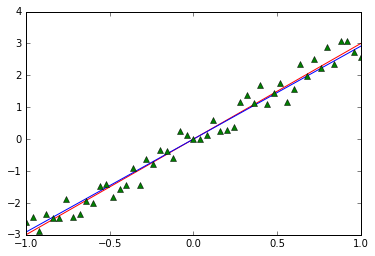

Error para el multiplicador 3: 0.0834147593353
Error para el multiplicador aprendido "a" 2.91562867165: 0.0863755147679


In [18]:
import theano
from theano import tensor as T

a = random.random() * 10 - 5
print('Valor Aleatorio de "a": {}'.format(a))
X = T.vector()
Y = T.vector()
w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
cost = T.mean(T.sqr(Y - w * X))
gradient = T.grad(cost=cost, wrt=w)
updates = [[w, w - gradient * 0.01]]
train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
lineal_theano = theano.function(inputs=[X], outputs=(w*X), allow_input_downcast=True)
errors = []
epochs = 500
for i in xrange(0, epochs):
    e = train(x, y)
    print('{} Error: {}'.format(i, e))
    errors.append(e)
a = w.get_value()
print('Final a: {}'.format(a))
plt.plot(np.asarray(range(0, epochs)), np.asarray(errors))
plt.show()
plt.plot(x, lineal(3, x), 'r-', x, lineal(a, x), 'b-', x, y, 'g^')
plt.show()
print('Error para el multiplicador 3: {}'.format(mse(y, lineal(3,x))))
print('Error para el multiplicador aprendido "a" {}: {}'.format(a, mse(y, lineal_theano(x))))